<a href="https://colab.research.google.com/github/mylyyyyy/MachineLearning-smt5/blob/main/modul10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow_datasets as tfds
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+metric], '')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])

dataset, info = tfds.load('imdb_reviews', with_info=True, as_supervised=True)

train_dataset, test_dataset = dataset['train'], dataset['test']

train_dataset.element_spec

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteV5YOZG/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteV5YOZG/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteV5YOZG/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


(TensorSpec(shape=(), dtype=tf.string, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None))

Kode tersebut berfungsi untuk memuat dataset tinjauan film IMDb menggunakan TensorFlow Datasets (tfds). Pertama, kode mendefinisikan fungsi plot_graphs untuk visualisasi riwayat pelatihan model menggunakan Matplotlib. Kemudian, dataset IMDb dimuat dengan argumen with_info=True untuk mendapatkan informasi tambahan tentang dataset, dan as_supervised=True untuk memuat dataset dalam format tupel yang berisi contoh dan labelnya. Hasilnya, dataset dibagi menjadi set pelatihan (train_dataset) dan pengujian (test_dataset). Meskipun ada pemanggilan element_spec, itu tidak digunakan dalam potongan kode ini. Potongan kode tersebut menjadi dasar untuk melatih model klasifikasi sentimen pada tinjauan film IMDb dan memvisualisasikan performanya.

In [ ]:
dataset, info = tfds.load('imdb_reviews', with_info=True,
                          as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

train_dataset.element_spec

(TensorSpec(shape=(), dtype=tf.string, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None))

In [ ]:
for example, label in train_dataset.take(1):
  print('text: ', example.numpy())
  print('label: ', label.numpy())

text:  b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."
label:  0


Potongan kode tersebut menggunakan metode take(1) untuk mengambil satu contoh dari set pelatihan (train_dataset). Dalam setiap iterasi, kode mencetak teks dari contoh tersebut (example.numpy()) dan labelnya (label.numpy()). Dengan memanggil numpy(), data dalam bentuk TensorFlow tensor diubah menjadi format numpy untuk kemudahan pembacaan. Ini memberikan gambaran singkat tentang struktur data dalam dataset, memperlihatkan satu contoh teks dan labelnya. Dengan demikian, potongan kode ini membantu pengguna memahami format dan isi dari elemen-elemen dalam dataset pelatihan IMDb, yang berguna untuk pemahaman awal sebelum melibatkan dataset dalam pelatihan model klasifikasi sentimen atau tugas lainnya.

In [ ]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

for example, label in train_dataset.take(1):
  print('texts: ', example.numpy()[:3])
  print()
  print('labels: ', label.numpy()[:3])


texts:  [b"I think this is what this movie wants us to say at the end of the movie! or Damn Australian? I still don't know, but what I know is that I really liked this movie but that couldn't be my favorite movie!<br /><br />Great story with great actors but with a terrible end... To make you cry and say 'Oh, she's so good'... Still, who made it? What really happened? Who's that guy? No answer to these questions...<br /><br />Mysterious movie with a good mark overall... I give it a 8/10, going on the 8.5!"
 b'Most italian horror lovers seem to hate this movie since because it has no connection to the first two Demons films. And with the "Demons III" in the title, one would assume it would. The problem is that this film was never intended to be part of the Demons series. The distributors only a "Demons III" above its original title "The Ogre" to cash in on the other films popularity. The new American DVD release of this picture has the title "Demons III: The Ogre" on the box art but the

kode tersebut mengatur konfigurasi untuk pelatihan model dengan menggunakan TensorFlow. Parameter BUFFER_SIZE menentukan ukuran buffer untuk mengacak dataset pelatihan sebelum setiap epoch, sedangkan BATCH_SIZE menentukan ukuran setiap batch data yang akan digunakan dalam satu iterasi pelatihan. Selanjutnya, dataset pelatihan diacak, dibagi menjadi batch sesuai dengan BATCH_SIZE, dan di-pre-fetch untuk meningkatkan efisiensi dalam pemrosesan data. Hal yang sama dilakukan pada dataset pengujian, tetapi tanpa pengacakan karena pengacakan hanya diperlukan pada tahap pelatihan. Kemudian, dengan menggunakan loop for dan metode take(1), tiga contoh teks dan label dari dataset pelatihan dicetak. Dengan mengambil tiga contoh pertama ([:3]), potongan kode ini memberikan gambaran singkat tentang struktur dan isi dari batch pertama dalam dataset pelatihan, yang berguna untuk memahami bagaimana data disiapkan sebelum digunakan dalam pelatihan model klasifikasi sentimen IMDb.



In [ ]:
VOCAB_SIZE = 1000
encoder = tf.keras.layers.TextVectorization(max_tokens=VOCAB_SIZE)
encoder.adapt(train_dataset.map(lambda text, label: text))

In [ ]:
vocab=np.array(encoder.get_vocabulary())
vocab[:20]

array(['', '[UNK]', 'the', 'and', 'a', 'of', 'to', 'is', 'in', 'it', 'i',
       'this', 'that', 'br', 'was', 'as', 'for', 'with', 'movie', 'but'],
      dtype='<U14')

In [ ]:
encoded_example=encoder(example)[:3].numpy()
encoded_example

array([[ 10, 103,  11, ...,   0,   0,   0],
       [ 88,   1, 197, ...,   0,   0,   0],
       [  1, 341,   6, ...,   0,   0,   0]])

In [ ]:
for n in range(3):
  print("Original: ", example[n].numpy())
  print("Round-trip: ", " ".join(vocab[encoded_example[n]]))
  print()

Original:  b"I think this is what this movie wants us to say at the end of the movie! or Damn Australian? I still don't know, but what I know is that I really liked this movie but that couldn't be my favorite movie!<br /><br />Great story with great actors but with a terrible end... To make you cry and say 'Oh, she's so good'... Still, who made it? What really happened? Who's that guy? No answer to these questions...<br /><br />Mysterious movie with a good mark overall... I give it a 8/10, going on the 8.5!"
Round-trip:  i think this is what this movie wants us to say at the end of the movie or [UNK] [UNK] i still dont know but what i know is that i really liked this movie but that couldnt be my favorite moviebr br great story with great actors but with a terrible end to make you [UNK] and say oh shes so good still who made it what really happened whos that guy no [UNK] to these [UNK] br [UNK] movie with a good mark overall i give it a [UNK] going on the [UNK]                          

In [ ]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

 kode tersebut merupakan definisi model neural network menggunakan TensorFlow Keras untuk tugas klasifikasi sentimen pada dataset IMDb. Model ini memanfaatkan layer embedding dengan pre-trained text encoder, diikuti oleh layer Embedding Keras untuk representasi vektor 64 dimensi. Selanjutnya, model memiliki layer Bidirectional LSTM untuk pemahaman konteks dua arah, layer Dense dengan aktivasi ReLU, dan layer Dense terakhir tanpa fungsi aktivasi untuk output klasifikasi biner. Keseluruhannya, model ini dirancang untuk mengonversi teks menjadi representasi vektor dan memahami konteks melalui LSTM, untuk menghasilkan prediksi sentimen positif atau negatif.

In [ ]:
print([layer.supports_masking for layer in model.layers])

[False, True, True, True, True]


In [ ]:
# predict on a sample text without padding.

sample_text = ('The movie was cool. The animation and the graphics '
               'were out of this world. I would recommend this movie.')
predictions = model.predict(np.array([sample_text]))
print(predictions[0])

1/1 [==============================] - 9s 9s/step
[-0.01358437]


In [ ]:
# predict on a sample text with padding
padding = "the " * 2000
predictions = model.predict(np.array([sample_text, padding]))
print(predictions[0])

1/1 [==============================] - 0s 72ms/step
[-0.01358437]


In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_dataset, epochs=10, validation_data=test_dataset, validation_steps=30)

Epoch 1/10
391/391 [==============================] - 52s 106ms/step - loss: 0.6533 - accuracy: 0.5569 - val_loss: 0.6371 - val_accuracy: 0.6833
Epoch 2/10
391/391 [==============================] - 27s 69ms/step - loss: 0.4639 - accuracy: 0.7743 - val_loss: 0.3903 - val_accuracy: 0.8323
Epoch 3/10
391/391 [==============================] - 27s 69ms/step - loss: 0.3552 - accuracy: 0.8404 - val_loss: 0.3537 - val_accuracy: 0.8438
Epoch 4/10
391/391 [==============================] - 27s 69ms/step - loss: 0.3280 - accuracy: 0.8568 - val_loss: 0.3306 - val_accuracy: 0.8573
Epoch 5/10
391/391 [==============================] - 26s 67ms/step - loss: 0.3163 - accuracy: 0.8634 - val_loss: 0.3395 - val_accuracy: 0.8547
Epoch 6/10
391/391 [==============================] - 27s 68ms/step - loss: 0.3101 - accuracy: 0.8670 - val_loss: 0.3235 - val_accuracy: 0.8589
Epoch 7/10
391/391 [==============================] - 26s 66ms/step - loss: 0.3072 - accuracy: 0.8684 - val_loss: 0.3247 - val_accuracy

In [ ]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

391/391 [==============================] - 13s 34ms/step - loss: 0.3196 - accuracy: 0.8624
Test Loss: 0.3195785880088806
Test Accuracy: 0.8624399900436401


(0.0, 0.6710665747523308)

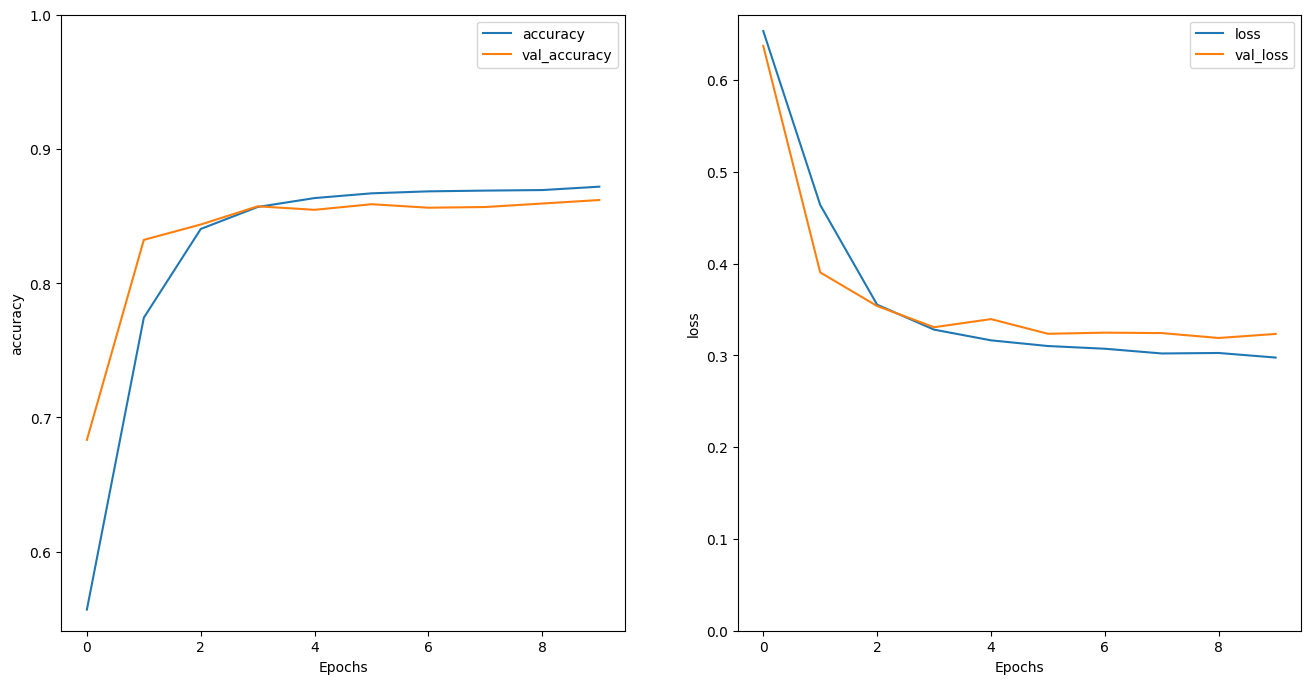

In [ ]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)

kode tersebut menggunakan Matplotlib untuk membuat grafik evaluasi performa model. Dua subplot disusun dalam satu baris dan dua kolom pada suatu gambar. Subplot pertama (subplot(1, 2, 1)) menampilkan grafik akurasi ('accuracy') dari riwayat pelatihan (history), sementara subplot kedua (subplot(1, 2, 2)) menampilkan grafik kerugian ('loss'). Fungsi plot_graphs digunakan untuk menggambar grafik, yang mungkin telah didefinisikan sebelumnya dan tidak ditampilkan dalam potongan kode ini. Pengaturan plt.ylim digunakan untuk menetapkan batas sumbu y pada masing-masing subplot, sehingga akurasi dibatasi antara 0 dan 1, sementara kerugian dimulai dari 0. Gambar ini memberikan visualisasi visual tentang bagaimana akurasi dan kerugian model berubah sepanjang waktu selama pelatihan. Dengan ukuran gambar yang diatur sebesar (16, 8), grafik ini dimaksudkan untuk memberikan tampilan yang jelas dan mudah dipahami.

In [ ]:
sample_text = ('The movie was cool. The animation and the graphics ' 'were out of this world. I would recommend this movie.')
predictions = model.predict(np.array([sample_text]))

1/1 [==============================] - 2s 2s/step


In [ ]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(len(encoder.get_vocabulary()), 64, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])

In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
optimizer=tf.keras.optimizers.Adam(1e-4),
metrics=['accuracy'])

In [ ]:
history = model.fit(train_dataset, epochs=10,
validation_data=test_dataset,
validation_steps=30)

Epoch 1/10
391/391 [==============================] - 83s 162ms/step - loss: 0.6463 - accuracy: 0.5562 - val_loss: 0.4843 - val_accuracy: 0.7521
Epoch 2/10
391/391 [==============================] - 49s 126ms/step - loss: 0.4113 - accuracy: 0.8220 - val_loss: 0.3793 - val_accuracy: 0.8438
Epoch 3/10
391/391 [==============================] - 53s 135ms/step - loss: 0.3530 - accuracy: 0.8514 - val_loss: 0.3424 - val_accuracy: 0.8562
Epoch 4/10
391/391 [==============================] - 49s 125ms/step - loss: 0.3312 - accuracy: 0.8601 - val_loss: 0.3285 - val_accuracy: 0.8495
Epoch 5/10
391/391 [==============================] - 49s 124ms/step - loss: 0.3163 - accuracy: 0.8655 - val_loss: 0.3332 - val_accuracy: 0.8568
Epoch 6/10
391/391 [==============================] - 49s 125ms/step - loss: 0.3088 - accuracy: 0.8696 - val_loss: 0.3179 - val_accuracy: 0.8562
Epoch 7/10
391/391 [==============================] - 49s 124ms/step - loss: 0.3064 - accuracy: 0.8701 - val_loss: 0.3191 - val_ac

In [ ]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

391/391 [==============================] - 21s 53ms/step - loss: 0.3325 - accuracy: 0.8606
Test Loss: 0.33247238397598267
Test Accuracy: 0.8606399893760681


In [ ]:
# predict on a sample text without padding.

sample_text = ('The movie was not good. The animation and the graphics ' 'were terrible. I would not recommend this movie.')
predictions = model.predict(np.array([sample_text]))
print(predictions)

1/1 [==============================] - 6s 6s/step
[[-1.9567937]]


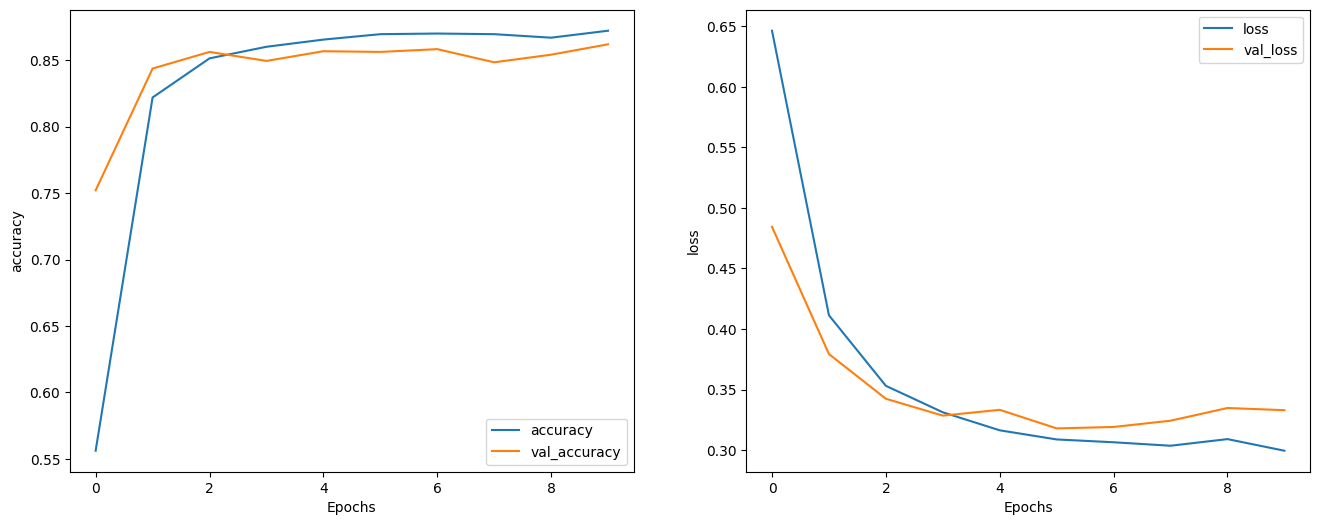

In [ ]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')

kode tersebut menggunakan Matplotlib untuk membuat gambar dengan dua subplot, yang disusun dalam satu baris dan dua kolom pada suatu gambar. Subplot pertama (subplot(1, 2, 1)) menampilkan grafik akurasi ('accuracy') dari riwayat pelatihan (history), sementara subplot kedua (subplot(1, 2, 2)) menampilkan grafik kerugian ('loss'). Fungsi plot_graphs digunakan untuk menggambar grafik, yang mungkin telah didefinisikan sebelumnya dan tidak ditampilkan dalam potongan kode ini. Dengan ukuran gambar yang diatur sebesar (16, 6), grafik ini dimaksudkan untuk memberikan tampilan yang luas dan mudah dipahami terkait perubahan akurasi dan kerugian model selama pelatihan. Penggunaan subplot memungkinkan pembandingan langsung antara metrik akurasi dan kerugian dalam satu tampilan.

## PRAKTIKUM 2

In [ ]:
import tensorflow as tf
import numpy as np
import os
import time

In [ ]:
path_to_file=tf.keras.utils.get_file('shakespeare.txt','https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt')

1115394/1115394 [==============================] - 0s 0us/step


In [ ]:
# Read, then decode for py2 compat.
text = open(path_to_file, 'rb').read().decode(encoding='utf-8')
# length of text is the number of characters in it
print(f'Length of text: {len(text)} characters')

Length of text: 1115394 characters


In [ ]:
# The unique characters in the file
vocab = sorted(set(text))
print(f'{len(vocab)} unique characters')

65 unique characters


In [ ]:
example_texts=['abcdefg','xyz']
chars=tf.strings.unicode_split(example_texts,input_encoding='UTF-8')
chars

<tf.RaggedTensor [[b'a', b'b', b'c', b'd', b'e', b'f', b'g'], [b'x', b'y', b'z']]>

In [ ]:
ids_from_chars=tf.keras.layers.StringLookup(vocabulary=list(vocab),mask_token=None)
ids=ids_from_chars(chars)
ids

<tf.RaggedTensor [[40, 41, 42, 43, 44, 45, 46], [63, 64, 65]]>

In [ ]:
chars_from_ids = tf.keras.layers.StringLookup(
    vocabulary=ids_from_chars.get_vocabulary(), invert=True, mask_token=None)

In [ ]:
chars=chars_from_ids(ids)
chars

<tf.RaggedTensor [[b'a', b'b', b'c', b'd', b'e', b'f', b'g'], [b'x', b'y', b'z']]>

In [ ]:
tf.strings.reduce_join(chars,axis=-1).numpy()

array([b'abcdefg', b'xyz'], dtype=object)

In [ ]:
def text_from_ids(ids):
    return tf.strings.reduce_join(chars_from_ids(ids),axis=-1)

In [ ]:
all_ids=ids_from_chars(tf.strings.unicode_split(text,'UTF-8'))
all_ids

<tf.Tensor: shape=(1115394,), dtype=int64, numpy=array([19, 48, 57, ..., 46,  9,  1])>

In [ ]:
ids_dataset=tf.data.Dataset.from_tensor_slices(all_ids)

In [ ]:
for ids in ids_dataset.take(10):
    print(chars_from_ids(ids).numpy().decode('utf-8'))

F
i
r
s
t
 
C
i
t
i


 kode tersebut menggunakan metode take(10) untuk mengambil sepuluh contoh dari dataset dengan nama ids_dataset. Dalam setiap iterasi loop for, kode mencetak hasil dekoding dari setiap ID dalam dataset menggunakan fungsi chars_from_ids(ids).numpy().decode('utf-8'). Fungsi ini berfungsi untuk mengonversi ID menjadi karakter dan kemudian mengonversi tensor numpy ke string UTF-8. Dengan demikian, potongan kode ini memberikan gambaran singkat dari sepuluh contoh karakter yang dihasilkan dari dataset ID, membantu untuk memahami struktur dan isi dari dataset tersebut.

In [ ]:
seq_length=100

In [ ]:
sequences = ids_dataset.batch(seq_length+1, drop_remainder=True)

for seq in sequences.take(1):
  print(chars_from_ids(seq))

tf.Tensor(
[b'F' b'i' b'r' b's' b't' b' ' b'C' b'i' b't' b'i' b'z' b'e' b'n' b':'
 b'\n' b'B' b'e' b'f' b'o' b'r' b'e' b' ' b'w' b'e' b' ' b'p' b'r' b'o'
 b'c' b'e' b'e' b'd' b' ' b'a' b'n' b'y' b' ' b'f' b'u' b'r' b't' b'h'
 b'e' b'r' b',' b' ' b'h' b'e' b'a' b'r' b' ' b'm' b'e' b' ' b's' b'p'
 b'e' b'a' b'k' b'.' b'\n' b'\n' b'A' b'l' b'l' b':' b'\n' b'S' b'p' b'e'
 b'a' b'k' b',' b' ' b's' b'p' b'e' b'a' b'k' b'.' b'\n' b'\n' b'F' b'i'
 b'r' b's' b't' b' ' b'C' b'i' b't' b'i' b'z' b'e' b'n' b':' b'\n' b'Y'
 b'o' b'u' b' '], shape=(101,), dtype=string)


Potongan kode tersebut mengambil dataset ids_dataset dan membentuk urutan (sequences) dari ID dengan menggunakan metode batch(seq_length+1, drop_remainder=True). Pada tahap ini, ID digabungkan menjadi urutan dengan panjang seq_length + 1 (menambahkan 1 untuk menyertakan target berikutnya), dan jika panjangnya tidak sesuai, bagian sisa akan dihapus (drop_remainder=True).

Dalam loop for berikutnya, kode menggunakan fungsi chars_from_ids(seq) untuk mengonversi setiap ID dalam urutan tersebut menjadi karakter dan mencetak hasilnya. Ini memberikan wawasan tentang bagaimana dataset diorganisir dalam urutan karakter, yang berguna untuk memahami struktur dan pola dari data yang akan digunakan dalam pelatihan model. Potongan kode ini membantu melihat bagaimana teks diolah dan dipecah menjadi urutan yang sesuai dengan panjang yang diinginkan.

In [ ]:
for seq in sequences.take(5):
    print(text_from_ids(seq).numpy())

b'First Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou '
b'are all resolved rather to die than to famish?\n\nAll:\nResolved. resolved.\n\nFirst Citizen:\nFirst, you k'
b"now Caius Marcius is chief enemy to the people.\n\nAll:\nWe know't, we know't.\n\nFirst Citizen:\nLet us ki"
b"ll him, and we'll have corn at our own price.\nIs't a verdict?\n\nAll:\nNo more talking on't; let it be d"
b'one: away, away!\n\nSecond Citizen:\nOne word, good citizens.\n\nFirst Citizen:\nWe are accounted poor citi'


In [ ]:
def split_input_target(sequence):
  input_text = sequence[:-1]
  target_text = sequence[1:]
  return input_text, target_text

In [ ]:
split_input_target(list("Tensorflow"))
dataset = sequences.map(split_input_target)

In [ ]:
for input_example, target_example in dataset.take(1):
  print("Input :", text_from_ids(input_example).numpy())
  print("Target:", text_from_ids(target_example).numpy())

Input : b'First Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou'
Target: b'irst Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou '


In [ ]:
# Batch size
BATCH_SIZE = 64

# Buffer size to shuffle the dataset
# (TF data is designed to work with possibly infinite sequences,
# so it doesn't attempt to shuffle the entire sequence in memory. Instead,
# it maintains a buffer in which it shuffles elements).
BUFFER_SIZE = 10000

dataset = (
    dataset
    .shuffle(BUFFER_SIZE)
    .batch(BATCH_SIZE, drop_remainder=True)
    .prefetch(tf.data.experimental.AUTOTUNE))

dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(64, 100), dtype=tf.int64, name=None), TensorSpec(shape=(64, 100), dtype=tf.int64, name=None))>

In [ ]:
# Length of the vocabulary in StringLookup Layer
vocab_size = len(ids_from_chars.get_vocabulary())

# The embedding dimension
embedding_dim = 256

# Number of RNN units
rnn_units = 1024

In [ ]:
class MyModel(tf.keras.Model):
  def __init__(self, vocab_size, embedding_dim, rnn_units):
    super().__init__(self)
    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.gru = tf.keras.layers.GRU(rnn_units,
                                   return_sequences=True,
                                   return_state=True)
    self.dense = tf.keras.layers.Dense(vocab_size)

  def call(self, inputs, states=None, return_state=False, training=False):
    x = inputs
    x = self.embedding(x, training=training)
    if states is None:
      states = self.gru.get_initial_state(x)
    x, states = self.gru(x, initial_state=states, training=training)
    x = self.dense(x, training=training)

    if return_state:
      return x, states
    else:
      return x

In [ ]:
model = MyModel(
    vocab_size=vocab_size,
    embedding_dim=embedding_dim,
    rnn_units=rnn_units)

In [ ]:
for input_example_batch, target_example_batch in dataset.take(1):
    example_batch_predictions = model(input_example_batch)
    print(example_batch_predictions.shape, "# (batch_size, sequence_length, vocab_size)")

(64, 100, 66) # (batch_size, sequence_length, vocab_size)


In [ ]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       multiple                  16896     
                                                                 
 gru (GRU)                   multiple                  3938304   
                                                                 
 dense (Dense)               multiple                  67650     
                                                                 
Total params: 4022850 (15.35 MB)
Trainable params: 4022850 (15.35 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
sampled_indices = tf.random.categorical(example_batch_predictions[0], num_samples=1)
sampled_indices = tf.squeeze(sampled_indices, axis=-1).numpy()
sampled_indices

array([46,  6, 58, 14, 34, 42, 52,  1, 21, 40, 54,  8, 56,  5, 23, 23, 23,
       21, 17, 15, 63, 30, 20, 35, 61,  3, 44, 32, 21, 46, 50, 48, 63, 58,
        6, 18, 28, 56,  8, 15, 57, 18, 59, 47, 51, 36, 37, 27, 34, 43, 15,
       40, 62,  8, 53, 48,  1, 13, 27, 45, 52,  3, 44, 44, 38,  8, 48, 18,
        3, 60, 29,  6,  4,  2, 36, 43, 62,  6, 23, 28, 47, 31, 52, 26, 41,
        1, 10, 49,  3, 18,  6, 33,  6, 22, 13, 33, 25, 13, 47, 28])

In [ ]:
print("Input:\n", text_from_ids(input_example_batch[0]).numpy())
print()
print("Next Char Predictions:\n", text_from_ids(sampled_indices).numpy())

Input:
 b"ive us some seats. Come, cousin Angelo;\nIn this I'll be impartial; be you judge\nOf your own cause. I"

Next Char Predictions:
 b"g'sAUcm\nHao-q&JJJHDBxQGVv!eSHgkixs'EOq-BrEthlWXNUdBaw-ni\n?Nfm!eeY-iE!uP'$ Wdw'JOhRmMb\n3j!E'T'I?TL?hO"


In [ ]:
loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True)

In [ ]:
example_batch_mean_loss = loss(target_example_batch, example_batch_predictions)
print("Prediction shape: ", example_batch_predictions.shape, " # (batch_size, sequence_length, vocab_size)")
print("Mean loss:        ", example_batch_mean_loss)

Prediction shape:  (64, 100, 66)  # (batch_size, sequence_length, vocab_size)
Mean loss:         tf.Tensor(4.1905184, shape=(), dtype=float32)


In [ ]:
tf.exp(example_batch_mean_loss).numpy()

66.05702

In [ ]:
model.compile(optimizer='adam', loss=loss)

In [ ]:
# Directory where the checkpoints will be saved
checkpoint_dir = './training_checkpoints'
# Name of the checkpoint files
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True)

In [ ]:
EPOCHS=20
history=model.fit(dataset,epochs=EPOCHS,callbacks=[checkpoint_callback])

Epoch 1/20
172/172 [==============================] - 14s 56ms/step - loss: 2.7400
Epoch 2/20
172/172 [==============================] - 11s 56ms/step - loss: 1.9977
Epoch 3/20
172/172 [==============================] - 12s 57ms/step - loss: 1.7180
Epoch 4/20
172/172 [==============================] - 12s 58ms/step - loss: 1.5553
Epoch 5/20
172/172 [==============================] - 12s 59ms/step - loss: 1.4560
Epoch 6/20
172/172 [==============================] - 12s 62ms/step - loss: 1.3876
Epoch 7/20
172/172 [==============================] - 16s 62ms/step - loss: 1.3348
Epoch 8/20
172/172 [==============================] - 12s 62ms/step - loss: 1.2906
Epoch 9/20
172/172 [==============================] - 12s 62ms/step - loss: 1.2488
Epoch 10/20
172/172 [==============================] - 12s 63ms/step - loss: 1.2096
Epoch 11/20
172/172 [==============================] - 13s 62ms/step - loss: 1.1711
Epoch 12/20
172/172 [==============================] - 12s 61ms/step - loss: 1.1305
E

In [ ]:
class OneStep(tf.keras.Model):
  def __init__(self, model, chars_from_ids, ids_from_chars, temperature=1.0):
    super().__init__()
    self.temperature = temperature
    self.model = model
    self.chars_from_ids = chars_from_ids
    self.ids_from_chars = ids_from_chars

    # Create a mask to prevent "[UNK]" from being generated.
    skip_ids = self.ids_from_chars(['[UNK]'])[:, None]
    sparse_mask = tf.SparseTensor(
        # Put a -inf at each bad index.
        values=[-float('inf')]*len(skip_ids),
        indices=skip_ids,
        # Match the shape to the vocabulary
        dense_shape=[len(ids_from_chars.get_vocabulary())])
    self.prediction_mask = tf.sparse.to_dense(sparse_mask)

  @tf.function
  def generate_one_step(self, inputs, states=None):
    # Convert strings to token IDs.
    input_chars = tf.strings.unicode_split(inputs, 'UTF-8')
    input_ids = self.ids_from_chars(input_chars).to_tensor()

    # Run the model.
    # predicted_logits.shape is [batch, char, next_char_logits]
    predicted_logits, states = self.model(inputs=input_ids, states=states,
                                          return_state=True)
    # Only use the last prediction.
    predicted_logits = predicted_logits[:, -1, :]
    predicted_logits = predicted_logits/self.temperature
    # Apply the prediction mask: prevent "[UNK]" from being generated.
    predicted_logits = predicted_logits + self.prediction_mask

    # Sample the output logits to generate token IDs.
    predicted_ids = tf.random.categorical(predicted_logits, num_samples=1)
    predicted_ids = tf.squeeze(predicted_ids, axis=-1)

    # Convert from token ids to characters
    predicted_chars = self.chars_from_ids(predicted_ids)

    # Return the characters and model state.
    return predicted_chars, states

In [ ]:
one_step_model=OneStep(model,chars_from_ids,ids_from_chars)

In [ ]:
start = time.time()
states = None
next_char = tf.constant(['ROMEO:'])
result = [next_char]

for n in range(1000):
  next_char, states = one_step_model.generate_one_step(next_char, states=states)
  result.append(next_char)

result = tf.strings.join(result)
end = time.time()
print(result[0].numpy().decode('utf-8'), '\n\n' + '_'*80)
print('\nRun time:', end - start)

ROMEO:
This is the neck, and spit thy father Marcius show
Mysiring woman. Heaven she doth me;
My sovereign liege-may not, higher;
The bloody all in Gloucester's death,
To pardon thereof encounter shall subject.

HENRY BOLINGBROKE:
Night ours but what I spake, so rich in heaven,
His island visits in a wanting queendy,
That by the king hath thus half spurning.'
I never did thee all to the Capitol and prince;
That dicest intented, who, ever, he
A know of curious earth friends to encounter of his
treason; he blood, bandle, buided, being but thy news:
He hath a prince to joyfully according for,
And so I am, to lay amist of thine.

EXETER:
O, well entee go with me.
Go, fellow, go tongue.
But, Quoentio, Romeo!

MENENIUS:
Condemn vex'd, that then stay wind wrong my lord.

QUEEN ELIZABETH:
Oh my daughter claims, the air by Gremio.

ROMEO:
As ever was never lied for any case that
There be one that, I think shall I be Marriar'd Hastings?

CALIBA:
I shall be satisfied.

MEMELIO:
And what I wot on 

In [ ]:
start = time.time()
states = None
next_char = tf.constant(['ROMEO:', 'ROMEO:', 'ROMEO:', 'ROMEO:', 'ROMEO:'])
result = [next_char]

for n in range(1000):
  next_char, states = one_step_model.generate_one_step(next_char, states=states)
  result.append(next_char)

result = tf.strings.join(result)
end = time.time()
print(result, '\n\n' + '_'*80)
print('\nRun time:', end - start)

tf.Tensor(
[b"ROMEO:\nI had rather be revenue.\n\nKING RICHARD III:\nNo, you can come.\n\nBENVOLIO:\nStands, Sir Richard: What?\n\nLUCIO:\nThou art some sevenalty.\n\nGREMIO:\nAnd, for Lord Angelo dukes it off.\n\nLUCIO:\nAs well the Duke of Norfolk, and 'tis plepared,\nAnd a peemish of much boy for the glander's points\nAnd revenge in prisoner. What! This accuse\nI tell thee, have I weep, when yet it cheek,\nHave held my innocent soul's refuse; therefore, be it known\nWith silver sound'st insulting by your tears.\n\nNORTHUMBERLAND:\nThe bloody broils to take another any threats,\nHis soverimes affairs: King Edward is a woman,\nThat had by him, the next necessity is\nrather for our friends. Therefore, we have again\nThan you pronuke to bid for him; who\nHave you but like itself no day, to gat pleased\nDoth lay aside: a very given and\nclear night. What though come hither so unlook'd\nFrom whence thou ortentation wind,\nWhose stronger-houses of honour, i' the light!\n\nJULIET:\nThe vein

In [ ]:
tf.saved_model.save(one_step_model, 'one_step')
one_step_reloaded = tf.saved_model.load('one_step')

In [ ]:
states = None
next_char = tf.constant(['ROMEO:'])
result = [next_char]

for n in range(100):
  next_char, states = one_step_reloaded.generate_one_step(next_char, states=states)
  result.append(next_char)

print(tf.strings.join(result)[0].numpy().decode("utf-8"))

ROMEO:
The secrecious ask him with a groan'd drews,
But they as yours for certain or your daughter.
Here i


 kode tersebut digunakan untuk menghasilkan teks dari model yang di-load kembali (one_step_reloaded). Dimulai dengan kata 'ROMEO:', kode tersebut melakukan iterasi sebanyak 100 kali untuk memprediksi karakter berikutnya pada setiap langkah menggunakan metode generate_one_step. Hasil prediksi ditambahkan ke dalam list result.

Selanjutnya, hasil prediksi diubah menjadi string menggunakan tf.strings.join(result)[0].numpy().decode("utf-8"). Ini menggabungkan hasil prediksi menjadi satu string dan mengonversinya ke dalam format UTF-8, sehingga menghasilkan teks yang diprediksi.

Potongan kode ini memberikan contoh penggunaan model yang di-load kembali untuk menghasilkan teks lanjutan berdasarkan input awal 'ROMEO:'. Pemanggilan generate_one_step pada setiap iterasi memungkinkan model untuk mengingat konteks sebelumnya dan menghasilkan teks yang berkembang sepanjang iterasi.